In [1]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2

Populating the interactive namespace from numpy and matplotlib


# Task1  - Bit down-conversion

TASK: 
Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

### Read data

> Read out original image

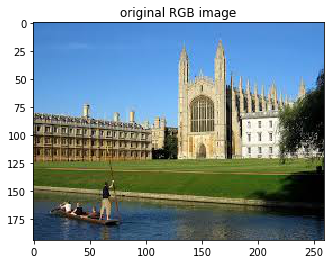

In [2]:
image = plt.imread('cam.jpg')
plt.title('original RGB image')
plt.imshow(image)

> Check the number of unique pixel values to be sure it's indeed an 8 bit image

In [3]:
np.unique(image).shape

(256,)

> Convert original RGB image to grayscale image

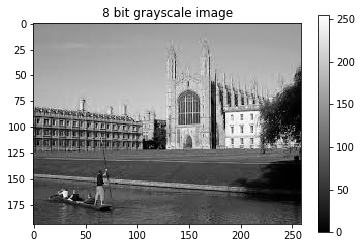

In [5]:
def rgb2gray(rgb_image):
    image_8bit = np.round(np.sum(rgb_image * np.array([0.114, 0.587, 0.299]), axis=-1)).astype('uint8')
    image_8bit[0,0]=255 #to compensate for the loss of 1 gray value during conversion
    plt.imshow(image_8bit , cmap='gray')
    plt.title('8 bit grayscale image')
    plt.colorbar()
    return image_8bit

gray_image = rgb2gray(image)

> Again check the number of unique pixel values

In [6]:
np.unique(gray_image).shape

(256,)

> Convert to a desired number of intensity levels

In [14]:
def bit_conversion(input_image, desired_intensity_levels):

    if desired_intensity_levels%2 == 0:
        #get initial number of bits
        initial_bits = int(np.log2(np.array(np.unique(input_image).shape)))
        print('Input image has ', initial_bits, ' bits')
        #
        # if the input image has more bits then desired
        if initial_bits > int(np.log2(desired_intensity_levels)):
            #
            #compute conversion factor
            conv_factor = 2**(initial_bits - int(np.log2(desired_intensity_levels)))
            print('Converting to ', int(np.log2(desired_intensity_levels)), ' bits...')
            #
            #reduce number of intensity levels
            final_image = (input_image[:,:]//conv_factor)*conv_factor
            plt.imshow(final_image, cmap = 'gray')
            plt.title('{} intensity levels'.format(int(np.array(np.unique(final_image).shape))))
            plt.show()
        else:
            raise ValueError('Desired number of intensity levels is too high!')
    else:
        raise ValueError('Desired number of intensoity levels is not modulo 2!')
    return final_image

Input image has  8  bits
Converting to  7  bits...


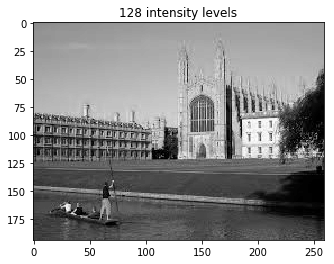

Input image has  8  bits
Converting to  6  bits...


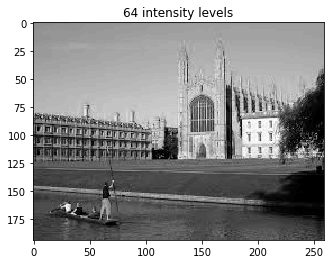

Input image has  8  bits
Converting to  5  bits...


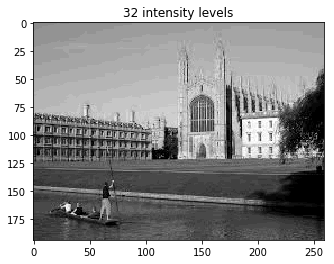

Input image has  8  bits
Converting to  4  bits...


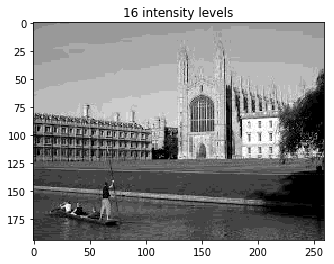

Input image has  8  bits
Converting to  3  bits...


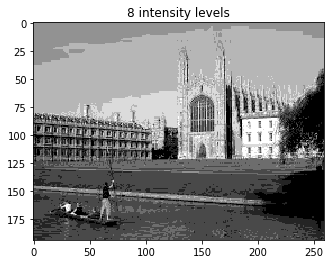

Input image has  8  bits
Converting to  2  bits...


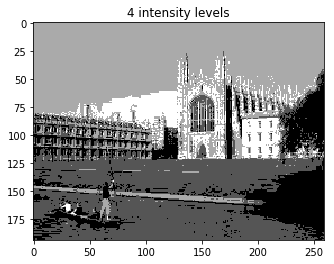

Input image has  8  bits
Converting to  1  bits...


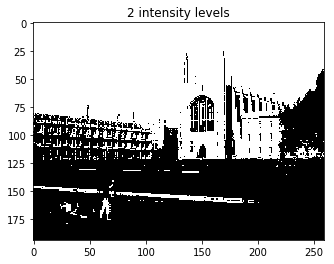

In [15]:
for bits in range(7,0,-1):
    new_image = bit_conversion(gray_image, desired_intensity_levels = 2**bits)
